## KNN
For regression problem, the k-nearest neighbor prediction is defined as:
\begin{aligned}
    \hat Y(x) = \sum_{x_i\in N_k(x)}\omega_i y_i,
\end{aligned}
where $N_k(x)$ is the neighborhood of x defined by the k closest points $x_i$ in the training samples, and $\sum_{x_i\in N_k(x)}\omega_i = 1$.

Let $\omega_i = \frac{1}{k}$, we have:
\begin{aligned}
    \hat Y(x) = \frac{1}{k}\sum_{x_i\in N_k(x)}y_i.
\end{aligned}

For classification problem, we can utilize the voting mechanism to conduct prediction, which can be formulated as:
$$
G_j(x) = \sum_{x_i\in N_k(x)}I(y_i=j),
$$

$$
\hat Y(x) = \mathop{\arg\max}_j G_j(x),
$$
where $I()$ is an indicator function which returns 1 if the statement is true and returns 0 otherwise.

## Datasets

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 

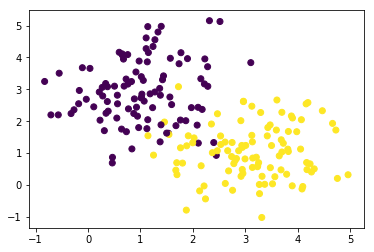

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# load data
path = '../../data/knn_data/'
# mnist or gauss
m_x = np.loadtxt(fname='%s_x'%(path+'mnist'), delimiter=' ')
m_y = np.loadtxt(fname='%s_y'%(path+'mnist'), delimiter=' ')
g_x = np.loadtxt(fname='%s_x'%(path+'gauss'), delimiter=' ')
g_y = np.loadtxt(fname='%s_y'%(path+'gauss'), delimiter=' ')

# show data
## mnist
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
print(data)

## gauss
plt.scatter(g_x[:, 0], g_x[:, 1], c=g_y)
plt.show()

In [5]:
# split data
thredhold = int(len(m_x) * 0.8)
train_data = {'x': m_x[:thredhold], 'y': m_y[:thredhold]}
test_data = {'x': m_x[thredhold:], 'y': m_y[thredhold:]}

## KNN in scikit-learn

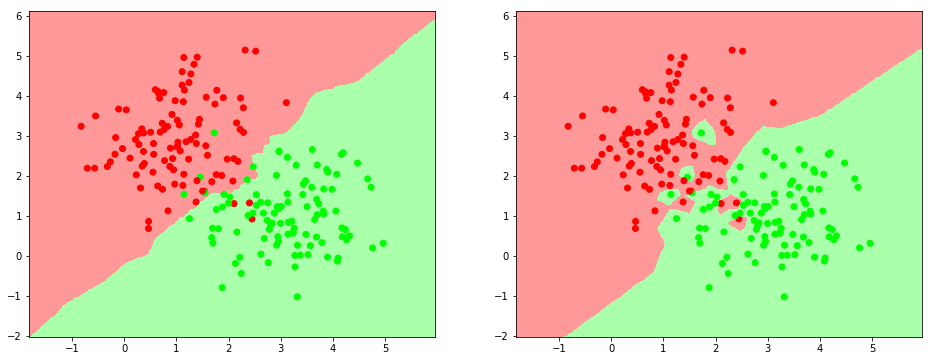

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

x = g_x
y = g_y

step = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.c_[xx.ravel(), yy.ravel()]

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(x, y)
z1 = knn1.predict(grid_data)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x, y)
z2 = knn2.predict(grid_data)

cmap_light = ListedColormap(['#FF9999', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pcolormesh(xx, yy, z1.reshape(xx.shape), cmap=cmap_light)
ax1.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
ax2.pcolormesh(xx, yy, z2.reshape(xx.shape), cmap=cmap_light)
ax2.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.show()